In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import math
%matplotlib inline
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper")

plt.rc('figure', figsize=(6,3))
plt.rc('figure.subplot', wspace=.33)

##  Problema 10

Ajuste el modelo de regresión polinomial de segundo orden utilizando los siguientes datos:

![Image](images/3.png)

In [2]:
import statsmodels.formula.api as smf

data = pd.read_csv("data/5_10.csv")

In [3]:
mod = smf.ols(formula='Y ~ X1 + X2 + I(X1**2) + I(X2**2) + I(X1*X2)', data=data)
res = mod.fit()

In [4]:
res.summary()

/Users/rgap/.virtualenvs/stats/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 27 Dec 2016   Prob (F-statistic):           1.56e-06
Time:                        03:21:08   Log-Likelihood:                -34.454
No. Observations:                  12   AIC:                             80.91
Df Residuals:                       6   BIC:                             83.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.4096     26.592      0.918      0.394       -40.658    89.477
X1           -38.0328     40.452     -0.940      0.383      -137.015    60.950
X2             0.7200     11.687      0.062      0.953       -27.877    29.317
I(X1 ** 2)    34.9754     21.556      1.623      0.156       -17.770    87.721
I(X2 ** 2)    11.0656      3.158      3.504      0.013         3.338    18.793
I(X1 * X2)    -9.9862      8.742     -1.142      0.297       -31.378    11.405
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.385
Skew:                           0.385   Prob(JB):                        0.825
Kurtosis:                       2.578   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ninguna  variable es altamente significativa a pesar del alto $R^2$

El modelo ajustado, presentaria los parametros

In [5]:
res.params

Intercept     24.409554
X1           -38.032794
X2             0.719976
I(X1 ** 2)    34.975442
I(X2 ** 2)    11.065588
I(X1 * X2)    -9.986223
dtype: float64

##  Problema 11

Se piensa que la potencia consumida al mes por una planta química está relacionada con la temperatura ambiente promedio (X1), el número de días al mes , (X2), la pureza producto del producto (X3) y las toneladas del producto producidas (X4) . Los datos correspondientes al año pasado son:

![Image](images/4.png)

**a. Ajuste un modelo de regresión lineal múltiple a los datos.**

In [6]:
data = pd.read_csv("data/5_11.csv")

In [7]:
mod = smf.ols(formula='Y ~ X1 + X2 + X3 + X4', data=data)
res = mod.fit()

In [8]:
res.summary()

/Users/rgap/.virtualenvs/stats/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     5.106
Date:                Tue, 27 Dec 2016   Prob (F-statistic):             0.0303
Time:                        03:21:09   Log-Likelihood:                -46.745
No. Observations:                  12   AIC:                             103.5
Df Residuals:                       7   BIC:                             105.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -102.7132    207.859     -0.494      0.636      -594.221   388.795
X1             0.6054      0.369      1.641      0.145        -0.267     1.478
X2             8.9236      5.301      1.684      0.136        -3.610    21.457
X3             1.4375      2.392      0.601      0.567        -4.218     7.093
X4             0.0136      0.734      0.019      0.986        -1.722     1.749
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.207
Skew:                          -0.039   Prob(JB):                        0.902
Kurtosis:                       2.362   Cond. No.                     6.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo:

$$
Y = -102.7132 + 0.6054 \cdot X_1 + 8.9236 \cdot X_2 + 1.4375 \cdot X_3 + 0.0136 \cdot X_4
$$

**b. Prediga el consumo de potencia para un mes en el que X1 = 75 oF, X2 = 24 días, X3 = 90% y X4 = 98 toneladas.**

In [9]:
consumo = {"X1": 75, "X2": 24, "X3": 90, "X4": 98}
res.predict(consumo)

array([ 287.5618328])

**c. Pruebe la significancia de la regresión utilizando α = 0.01. ¿Cuál es el valor P de esta prueba?**

Se realiza una prueba F

$H_0: \beta_1 = \beta_2 = \ldots = \beta_k = 0$
(Es decir, las variables no afectan a Y)

$H_1: \beta_i \neq 0$
(Al menos una variable afecta a Y)

Se rechaza $H_0$ si $F_{calc} = 5.106$ (del software), se encuentra en la region de rechazo.

In [10]:
from scipy.stats import f
n = data.shape[0]
params = 5
alpha = 0.01
[f.ppf(alpha, params - 1, n - params), f.ppf(1 - alpha, params - 1, n - params)]

[0.066774584614378074, 7.8466450625465969]

Se encuentra fuera de la region de rechazo.

Por lo tanto, Las variables no afectan a Y. Con significancia del 99%.

**d. Utilice la prueba t para evaluar la contribución al modelo de cada variable de regresión. Si se emplea α = 0.01, ¿qué conclusiones se puede obtener?.**

El software calcula los valores p.

In [11]:
res.pvalues

Intercept    0.636329
X1           0.144797
X2           0.136146
X3           0.566759
X4           0.985721
dtype: float64

$$
\begin{aligned}
0.144797 > \alpha = 0.01 \\
0.136146 > \alpha = 0.01 \\
0.566759 > \alpha = 0.01 \\
0.985721 > \alpha = 0.01
\end{aligned}
$$

Todos son mayores que la significancia, por tanto, ninguna de las variables influye sobre Y.

**e. Calcule R2 . Interprete esta cantidad.**

$R^2 = 0.745$

Se aproxima bastante a 1.

Es dificil decir que es un buen valor de $R^2$. Depende mucho del dominio.

Serviria de algo solo para compararlo con otros modelos.

**f. Haga una gráfica de residuos contra valores calculados. Interprete la gráfica.**

In [12]:
import statsmodels.api as sm
residual_col = res.resid
residual_col

0    -18.757981
1      1.886231
2     23.310885
3     -8.956456
4      9.185209
5      6.643554
6      4.813650
7     -0.156766
8    -17.850231
9    -12.937641
10     6.621568
11     6.197978
dtype: float64

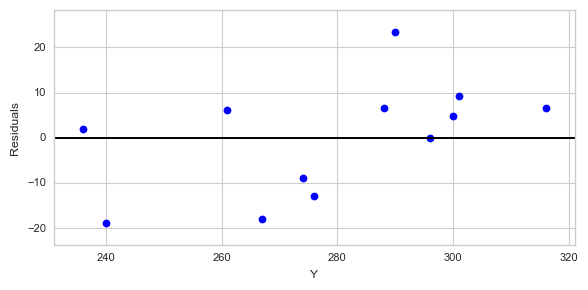

In [13]:
def residuals(df, columns, resids, r, c):
    fig = plt.figure()
    for i, col in zip(range(1, r*c + 1), columns):
        ax = fig.add_subplot(r, c, i)
        ax.plot(df[col], resids, 'o', color="b")
        ax.set_xlim([df[col].min() - 5, df[col].max() + 5])
        ax.set_ylim([resids.min() - 5, resids.max() + 5])
        ax.axhline(y=0, color="black")
        ax.set_xlabel(df[col].name)
        ax.set_ylabel('Residuals')
    plt.tight_layout()

residuals(data, ['Y'], residual_col, 1, 1)

La variable dependiente no parece presentar un patron. Con lo cual el modelo seria aceptable, pero por lo presentado antes, el modelo se rechaza de todos modos.